In [ ]:
!pip install calmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from collections import defaultdict 
import calmap
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/COVID clinical trials - COVID clinical trials.csv')
data.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Latitude,Longitude,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,"December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",48.829771,2.310331,NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,"December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",11.002707,-74.816968,NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,"June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",45.852120,9.415120,NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,"July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",22.269562,114.182962,NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",47.835363,1.920146,NaN,https://ClinicalTrials.gov/show/NCT04395924


In [ ]:
data.dtypes.sort_values(ascending=True)

Rank                         int64
Longitude                  float64
Latitude                   float64
Enrollment                 float64
Locations                   object
Last Update Posted          object
Results First Posted        object
First Posted                object
Completion Date             object
Primary Completion Date     object
Start Date                  object
Other IDs                   object
Study Designs               object
Study Type                  object
Funded Bys                  object
Phases                      object
Age                         object
Gender                      object
Sponsor/Collaborators       object
Outcome Measures            object
Interventions               object
Conditions                  object
Study Results               object
Status                      object
Acronym                     object
Title                       object
NCT Number                  object
Study Documents             object
URL                 

In [ ]:
data.describe()

,Rank,Enrollment,Latitude,Longitude
count,5783.000000,5.749000e+03,2254.000000,2254.000000
mean,2892.000000,1.831949e+04,36.329660,-12.516604
std,1669.552635,4.045437e+05,18.541405,61.664006
min,1.000000,0.000000e+00,-43.299155,-157.853858
25%,1446.500000,6.000000e+01,31.765150,-74.057076
50%,2892.000000,1.700000e+02,40.884422,2.371103
75%,4337.500000,5.600000e+02,47.542339,19.020407
max,5783.000000,2.000000e+07,64.138402,174.764488


In [ ]:
data.shape

(5783, 29)

In [ ]:
#Removing Unwanted Columns 
data.drop(['URL','Other IDs','Start Date','Completion Date','Primary Completion Date','First Posted','Results First Posted','Last Update Posted','Study Documents'],inplace=True,axis=1)

In [ ]:
data.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Locations', 'Latitude',
       'Longitude'],
      dtype='object')

**Question 1: There are different methods to replace null values in a data. Mention all of them and mention which one you choose and why?**



*   Dropna()- drops all the null values in rows and columns
*  replace()-replace a string, regex, list, dictionary, series, number etc. from a dataframe.
* fillna()- replace null value with specified value



Using Fillna Method to replace null values as it is found to be the most suitable method.



*   Fillna function easily replace Null Values 
*   It has different methods like bfill,ffill to set default value itself
*   We can also give value according to our need
*   Here use of value method and bfill,ffill is there



In [ ]:
#using fillna method to replace Null Values in Location by 'No Location'
data['Locations'].fillna('No Location',inplace=True)

In [ ]:
data['Interventions'].fillna(method="ffill",inplace=True)

In [ ]:
data['Phases'].fillna(method="ffill",inplace=True)

In [ ]:
data['Study Designs'].fillna(method="ffill",inplace=True)

In [ ]:
data['Outcome Measures'].fillna(method="ffill",inplace=True)

**Question 2: Explore different columns in your dataset and write your observations about the results. Use all the different plots you have been taught like pie chart, bar graph, histogram etc. and give reason why you think this is the best plot for a particular study.**

In [ ]:
def NullUnique(df):
    dic = defaultdict(list)
    for col in df.columns:
        dic['Feature'].append(col)
        dic['NumUnique'].append(len(df[col].unique()))
        dic['NumNull'].append(df[col].isnull().sum())
        dic['%Null'].append(round(df[col].isnull().sum()/df.shape[0] * 100,2))
    return pd.DataFrame(dict(dic)).sort_values(['%Null'],ascending=False).style.background_gradient()

In [ ]:
NullUnique(data)

,Feature,NumUnique,NumNull,%Null
19,Longitude,1500,3529,61.020000
18,Latitude,1501,3529,61.020000
3,Acronym,2339,3303,57.120000
13,Enrollment,963,34,0.590000
10,Gender,4,10,0.170000
5,Study Results,2,0,0.000000
6,Conditions,3067,0,0.000000
7,Interventions,4337,0,0.000000
8,Outcome Measures,5687,0,0.000000
9,Sponsor/Collaborators,3631,0,0.000000


**Observations:**
1.   **Null Observations**

*   Results First Posted has 99.9% Null values (with only 1 non Null value)
*   Study Documents has 98.15% Null Values
*   Acronyms has 53.1% Null Values
*   Phases has 43.43% Null Values

2.   **Unique Observations**

*   URL, Rank and NCT Number have Unique values for every data point
*   Some data points have same title and same 'Other Ids'








In [ ]:
fig = px.pie(data,'Study Results')
fig.update_layout(title='Do we have any results to study?')
fig.show()

**Observations:**

*   0.623% studies have attained some results
*   Remaining 99.4% results have NO RESULTS

In [ ]:
fig = go.Figure(go.Bar(
    x= data.groupby('Phases').agg('count')['Rank'].sort_values(ascending=False).index, 
    y= data.groupby('Phases').agg('count')['Rank'].sort_values(ascending=False).values,  
    text=data.groupby('Phases').agg('count')['Rank'].sort_values(ascending=False).index,
    textposition='outside',
    marker_color=data.groupby('Phases').agg('count')['Rank'].sort_values(ascending=False).values
))
fig.update_layout(title='Phases across Studies')
fig.show()

**Obervations:**

*   Most relevant takes are that a high number (378) of studies are in the 2nd Phase
*   77 Studies are in Phase 3
*   72 Studies are in Phase 4 (Very close to reaching a solution)
*   Majority Studies have Not Applicable Phase

In [ ]:
data.Status.hist()

In [ ]:
#top five interventions
interventional_studies = data[data['Study Type']=='Interventional']
top_interventions = interventional_studies['Interventions'].value_counts().sort_values(ascending=True)[-5:]
top_interventions.plot(kind='barh', title='Interventions')

In [ ]:
# Convert to numeric
interventional_studies['Enrollment'] = interventional_studies['Enrollment'].astype(int)

# Remove the trials with recruitment status withdrawn and terminated
enrollment = interventional_studies.loc[ (interventional_studies['Status'] != 'Withdrawn') & (interventional_studies['Status'] != 'Terminated')]
bins = [-1, 20, 40, 60, 100, 200, 400, 600, 1000]
group_names = ['< 20', '21-40', '41-60', '61-100', '101-200', '201-400', '401-600', '>600']
categories = pd.cut(enrollment['Enrollment'], bins, labels=group_names)

# Add categories as column in dataframe
enrollment['Category'] = categories

# View value counts
enrollment_counts = enrollment['Category'].value_counts().sort_index(ascending=True)
enrollment_counts.plot(kind='bar', title='Size of Interventional Trials')

**Question 3: What conditins are the above studies treating? Use visualization to show this and write your observations.**

Text(0.5, 1.0, 'What Conditions are we trying to treat')

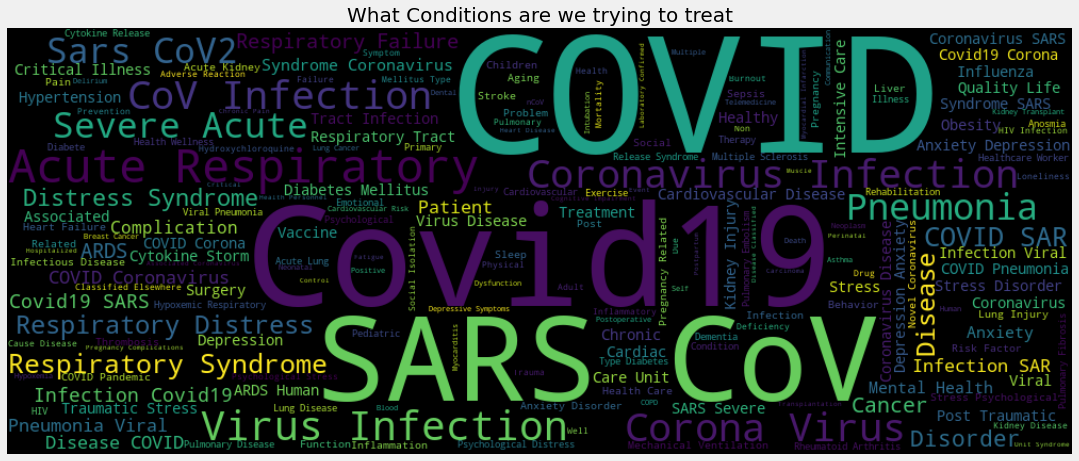

In [ ]:
conditions=list(data['Conditions'].dropna().unique())
fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud(width=1000,height=400).generate(" ".join(conditions))
ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('What Conditions are we trying to treat',fontsize=20)

In [ ]:
# Top 10 Conditions
interventional_studies = data[data['Study Type']=='Interventional']
condition = interventional_studies['Conditions'].value_counts().sort_values(ascending=True)[-10:]
condition.plot(kind='barh', title='Condition')

**Observations:**

*   The keywords are : COVID, Coronavirus, SARS, CoV, Acute Respiratory indicating major research 
*   being done to find a cure for these diseases
*   Less Common conditions are Mental illness, Viral Pneumonia, ARDS

**Question 4: Use a Map to show where these studies are taking place**

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 16.7 MB 343 kB/s 
     |████████████████████████████████| 6.3 MB 39.3 MB/s 


In [ ]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd
import folium
import matplotlib.pyplot as plt
from folium.plugins import FastMarkerCluster, HeatMap

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/COVID clinical trials - COVID clinical trials.csv", encoding='latin-1')
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Latitude,Longitude,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Nowâ¢ COVID-...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Nowâ¢ COVID-19 Screening ...,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,"December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",48.829771,2.310331,NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,"December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",11.002707,-74.816968,NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,"June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",45.852120,9.415120,NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,"July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",22.269562,114.182962,NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier RÃ©gional d'OrlÃ©ans|Centre...,...,May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR OrlÃ©ans, OrlÃ©ans, France",47.835363,1.920146,NaN,https://ClinicalTrials.gov/show/NCT04395924


In [ ]:
points = df[['Latitude','Longitude']].to_numpy()
points

array([[ 48.829771 ,   2.3103313],
       [ 11.002707 , -74.816968 ],
       [ 45.85212  ,   9.41512  ],
       ...,
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan]])

In [ ]:
# Replacing all Nan values to zero as folium map doesn't work on Nan values.
df['Latitude'] = df['Latitude'].replace(np.nan, 0)
df['Longitude'] = df['Longitude'].replace(np.nan, 0)

In [ ]:
folium_map = folium.Map(location=[28.556828,77.174210], zoom_start=12, tiles='cartodbpositron')
FastMarkerCluster(data=list(zip(df['Latitude'].values,df['Longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [ ]:
points = df[['Latitude','Longitude']].to_numpy()
points

array([[ 48.829771 ,   2.3103313],
       [ 11.002707 , -74.816968 ],
       [ 45.85212  ,   9.41512  ],
       ...,
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ]])

In [ ]:
folium_map = folium.Map(location=[28.556828,77.174210], zoom_start=12, tiles='cartodbpositron')
folium_map.add_child(HeatMap(points, radius=15))

**Question 5: Analyze what age bracket and gender these studies are considering and use different graphs to show these. Write your obervations.**



In [ ]:
def cleanAge(age):
    if len(re.findall(r'\(.*\)',age)):
        return re.findall(r'\(.*\)',age)[0]
    return '('+age+')'

In [ ]:
ageData = data.Age.apply(lambda x : cleanAge(x))
ageData.hist()

**Observations:**

*   Most Studies involve (Adult, Older Adult) Population
*   Only Child studies are very few

In [ ]:
data['AgeBrackets'] = ageData

In [ ]:
i = 0
fig = make_subplots(rows=3, cols=2, subplot_titles=list(pd.DataFrame(data.groupby(['AgeBrackets'])['Gender'].value_counts()).unstack().index))
for row in range(1,4):
    for col in range(1,3):
        dt = pd.DataFrame(data.groupby(['AgeBrackets'])['Gender'].value_counts()).unstack().iloc[i]
        fig.add_trace(go.Bar(x=dt.Gender.index,y=dt.Gender.values),row = row, col = col)        
        i+=1
fig.show()

**Observations:**


*   Most studies have taken data from All Genders
*   In (Adult) and (Child,Adult) Category there is significant number of Female patients considered for the studies